<a href="https://colab.research.google.com/github/yxrellx/Algoritmos/blob/main/clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('/content/elinar.csv')
df

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,quimio_terapia(2),radio_terapia(2)
0,2,43,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,1,0,0,0,1,1,0,0.000276,SI,SI
1,8,76,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,2,0,1,1,1,1,0.002373,No,SI
2,10,78,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,3,1,0,1,1,1,0.003653,SI,SI
3,28,86,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,2,0,0,0,1,2,0.000916,SI,SI
4,35,84,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,Her2,1,Negative,...,0,1,1,0,0,1,1,0.001644,SI,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,7278,67,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,0,1,1,0,1,5,2,0.012834,SI,No
1512,7280,63,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,0,3,1,0,1,4,0,0.023726,SI,No
1513,7284,61,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,0,10,0,0,0,5,2,0.012834,SI,No
1514,7286,66,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,...,0,1,1,0,0,4,2,0.036559,SI,No


In [17]:
df =df.drop(['patient_id','type_of_breast_surgery','cancer_type','cancer_type_detailed',"cellularity","pam50_+_claudin-low_subtype","er_status_measured_by_ihc","er_status", "her2_status_measured_by_snp6", "her2_status", "tumor_other_histologic_subtype", "inferred_menopausal_state","integrative_cluster", "primary_tumor_laterality","oncotree_code","pr_status","3-gene_classifier_subtype", "death_from_cancer","quimio_terapia(2)", "radio_terapia(2)"],axis=1)
df

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,1,0,0,0,1,1,0,0.000276
1,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,1,0,2,0,1,1,1,1,0.002373
2,78,0,1,3,1,0,4,0.006730,7.802601e-09,0,...,0,0,0,3,1,0,1,1,1,0.003653
3,86,0,1,3,1,1,5,0.008339,3.657886e-01,0,...,0,0,0,2,0,0,0,1,2,0.000916
4,84,0,1,2,0,0,1,0.005066,3.627876e-01,0,...,0,2,0,1,1,0,0,1,1,0.001644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,67,0,4,2,1,1,3,0.000065,2.410804e-08,0,...,0,0,0,1,1,0,1,5,2,0.012834
1512,63,0,4,2,1,6,6,0.000083,1.955985e-01,1,...,0,0,0,3,1,0,1,4,0,0.023726
1513,61,0,4,3,1,1,5,0.000082,2.030677e-08,0,...,0,0,0,10,0,0,0,5,2,0.012834
1514,66,0,4,3,1,3,2,0.000082,1.586862e-01,0,...,0,0,0,1,1,0,0,4,2,0.036559


In [18]:
features = df.values

In [ ]:
from sklearn.cluster import KMeans
common_params = {
    "n_init": "auto",
    "random_state": 2,
}
modelo = KMeans(n_clusters=10, **common_params)
y_pred = modelo.fit_predict(features)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features)
reduced_cluster_centers = pca.transform(modelo.cluster_centers_)
y_pred = modelo.predict(features)

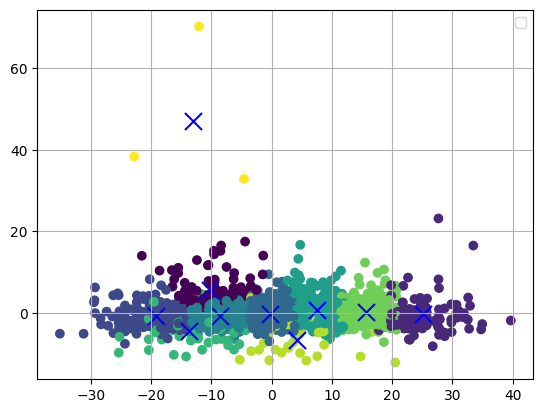

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=y_pred)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
ax.grid(True)
ax.legend()
plt.show()

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
len(y_pred)

1516

In [ ]:
df.reset_index(inplace=True, drop=False)

In [ ]:
ndf = df.copy()
ndf = pd.concat([ndf, pd.DataFrame(y_pred)], axis=1)
ndf

,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,0
0,0,43,0,1,3,1,0,2,0.000065,8.466155e-01,...,0,1,0,0,0,1,1,0,0.000276,7
1,1,76,1,1,3,1,8,2,0.000099,4.138046e-01,...,1,0,2,0,1,1,1,1,0.002373,6
2,2,78,0,1,3,1,0,4,0.006730,7.802601e-09,...,0,0,3,1,0,1,1,1,0.003653,2
3,3,86,0,1,3,1,1,5,0.008339,3.657886e-01,...,0,0,2,0,0,0,1,2,0.000916,2
4,4,84,0,1,2,0,0,1,0.005066,3.627876e-01,...,2,0,1,1,0,0,1,1,0.001644,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1511,67,0,4,2,1,1,3,0.000065,2.410804e-08,...,0,0,1,1,0,1,5,2,0.012834,4
1512,1512,63,0,4,2,1,6,6,0.000083,1.955985e-01,...,0,0,3,1,0,1,4,0,0.023726,3
1513,1513,61,0,4,3,1,1,5,0.000082,2.030677e-08,...,0,0,10,0,0,0,5,2,0.012834,3
1514,1514,66,0,4,3,1,3,2,0.000082,1.586862e-01,...,0,0,1,1,0,0,4,2,0.036559,4


In [ ]:
ndf.rename(columns={0:"Cluster"},inplace=True)
ndf

,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,Cluster
0,0,43,0,1,3,1,0,2,0.000065,8.466155e-01,...,0,1,0,0,0,1,1,0,0.000276,7
1,1,76,1,1,3,1,8,2,0.000099,4.138046e-01,...,1,0,2,0,1,1,1,1,0.002373,6
2,2,78,0,1,3,1,0,4,0.006730,7.802601e-09,...,0,0,3,1,0,1,1,1,0.003653,2
3,3,86,0,1,3,1,1,5,0.008339,3.657886e-01,...,0,0,2,0,0,0,1,2,0.000916,2
4,4,84,0,1,2,0,0,1,0.005066,3.627876e-01,...,2,0,1,1,0,0,1,1,0.001644,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1511,67,0,4,2,1,1,3,0.000065,2.410804e-08,...,0,0,1,1,0,1,5,2,0.012834,4
1512,1512,63,0,4,2,1,6,6,0.000083,1.955985e-01,...,0,0,3,1,0,1,4,0,0.023726,3
1513,1513,61,0,4,3,1,1,5,0.000082,2.030677e-08,...,0,0,10,0,0,0,5,2,0.012834,3
1514,1514,66,0,4,3,1,3,2,0.000082,1.586862e-01,...,0,0,1,1,0,0,4,2,0.036559,4


In [20]:
ndf[ndf["Cluster"]==0]

,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,Cluster
47,47,70,0,1,2,1,0,11,0.000049,1.110370e-08,...,0,0,0,1,0,0,0,0,0.001159,0
87,87,75,0,1,2,1,0,11,0.000049,1.220407e-08,...,1,0,1,0,1,1,4,0,0.002373,0
130,130,82,0,1,3,1,2,21,0.000082,4.298099e-01,...,0,0,1,1,0,1,4,1,0.002069,0
162,162,73,0,1,2,0,7,22,0.008511,8.992998e-09,...,1,0,9,0,1,0,4,1,0.008022,0
275,275,71,0,1,3,1,1,8,0.000083,1.284428e-08,...,0,0,2,0,0,1,4,0,0.005379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,1422,72,1,4,2,1,2,8,0.006704,4.384795e-01,...,0,0,4,1,0,0,5,1,0.012803,0
1429,1429,67,0,4,3,1,0,14,0.006702,1.140380e-08,...,0,0,5,1,0,0,6,0,0.012500,0
1452,1452,67,0,4,3,1,3,11,0.000082,5.695232e-01,...,0,0,6,1,0,0,4,1,0.008829,0
1472,1472,74,0,4,2,1,0,12,0.000049,1.420473e-08,...,0,0,6,0,0,0,4,0,0.021204,0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age_at_diagnosis'].plot(kind='hist', bins=20, title='age_at_diagnosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['chemotherapy'].plot(kind='hist', bins=20, title='chemotherapy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['cohort'].plot(kind='hist', bins=20, title='cohort')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='age_at_diagnosis', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='age_at_diagnosis', y='chemotherapy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='chemotherapy', y='cohort', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='cohort', y='neoplasm_histologic_grade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age_at_diagnosis']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age_at_diagnosis')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['chemotherapy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('chemotherapy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['cohort']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('cohort')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['neoplasm_histologic_grade']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('neoplasm_histologic_grade')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['age_at_diagnosis'].plot(kind='line', figsize=(8, 4), title='age_at_diagnosis')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['chemotherapy'].plot(kind='line', figsize=(8, 4), title='chemotherapy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['cohort'].plot(kind='line', figsize=(8, 4), title='cohort')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['level_0'].plot(kind='hist', bins=20, title='level_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['age_at_diagnosis'].plot(kind='hist', bins=20, title='age_at_diagnosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['chemotherapy'].plot(kind='hist', bins=20, title='chemotherapy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='level_0', y='index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='index', y='age_at_diagnosis', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='age_at_diagnosis', y='chemotherapy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='chemotherapy', y='cohort', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['age_at_diagnosis']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('age_at_diagnosis')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['chemotherapy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('chemotherapy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['cohort']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('cohort')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['neoplasm_histologic_grade']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('neoplasm_histologic_grade')

from matplotlib import pyplot as plt
_df_28['level_0'].plot(kind='line', figsize=(8, 4), title='level_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['age_at_diagnosis'].plot(kind='line', figsize=(8, 4), title='age_at_diagnosis')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['chemotherapy'].plot(kind='line', figsize=(8, 4), title='chemotherapy')
plt.gca().spines[['top', 'right']].set_visible(False)

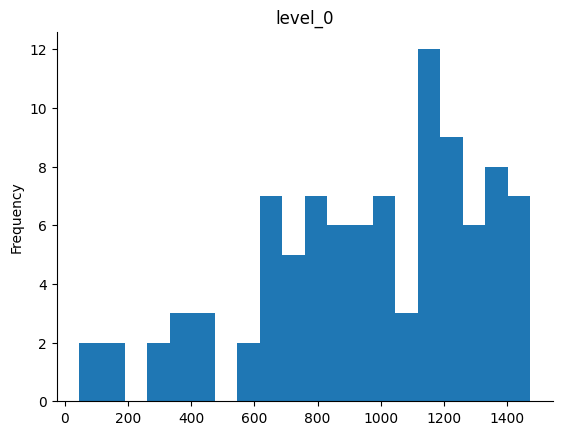

In [38]:
from matplotlib import pyplot as plt
_df_16['level_0'].plot(kind='hist', bins=20, title='level_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

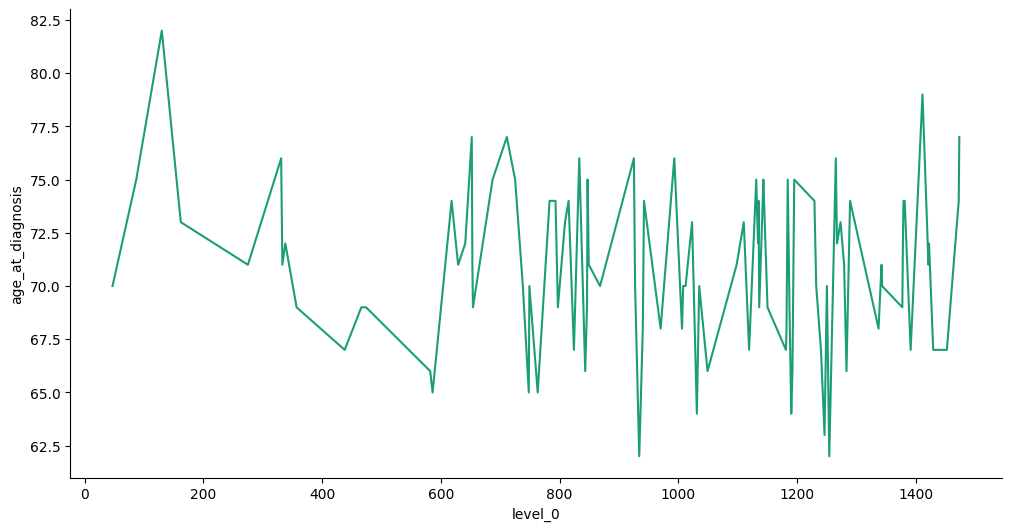

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['age_at_diagnosis']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('age_at_diagnosis')

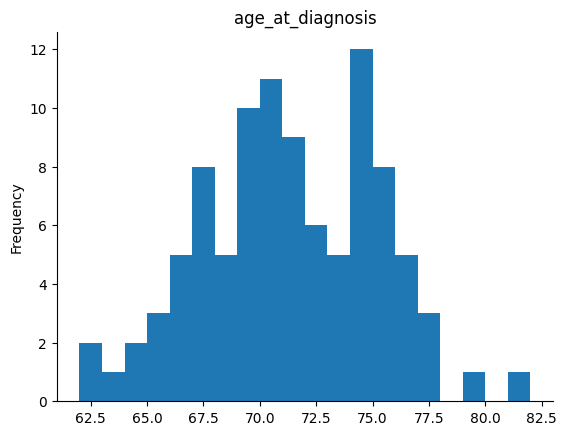

In [22]:
from matplotlib import pyplot as plt
_df_18['age_at_diagnosis'].plot(kind='hist', bins=20, title='age_at_diagnosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

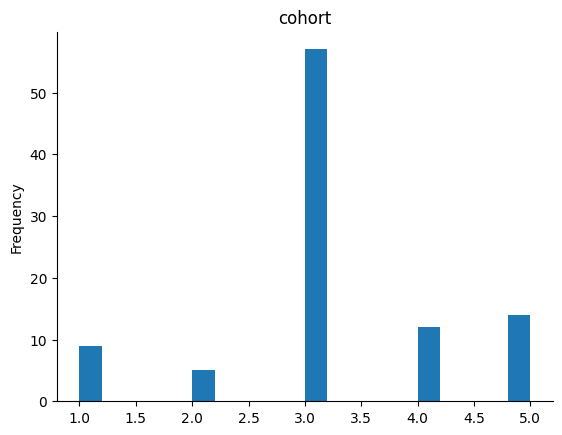

In [21]:
from matplotlib import pyplot as plt
_df_3['cohort'].plot(kind='hist', bins=20, title='cohort')
plt.gca().spines[['top', 'right',]].set_visible(False)

MEJORIA-Algoritmo

In [24]:
from sklearn.cluster import KMeans
common_params = {
    "n_init": "auto",
    "random_state": 8,
}
modelo = KMeans(n_clusters=10, **common_params)
y_pred = modelo.fit_predict(features)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features)
reduced_cluster_centers = pca.transform(modelo.cluster_centers_)
y_pred = modelo.predict(features)

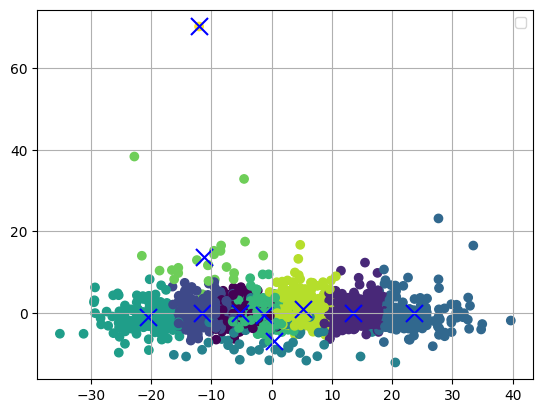

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=y_pred)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
ax.grid(True)
ax.legend()
plt.show()

In [28]:
type(y_pred)

numpy.ndarray

In [29]:
len(y_pred)

1516

In [30]:
df.reset_index(inplace=True, drop=False)

In [31]:
ndf = df.copy()
ndf = pd.concat([ndf, pd.DataFrame(y_pred)], axis=1)
ndf

,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,0
0,0,43,0,1,3,1,0,2,0.000065,8.466155e-01,...,0,1,0,0,0,1,1,0,0.000276,1
1,1,76,1,1,3,1,8,2,0.000099,4.138046e-01,...,1,0,2,0,1,1,1,1,0.002373,5
2,2,78,0,1,3,1,0,4,0.006730,7.802601e-09,...,0,0,3,1,0,1,1,1,0.003653,5
3,3,86,0,1,3,1,1,5,0.008339,3.657886e-01,...,0,0,2,0,0,0,1,2,0.000916,5
4,4,84,0,1,2,0,0,1,0.005066,3.627876e-01,...,2,0,1,1,0,0,1,1,0.001644,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1511,67,0,4,2,1,1,3,0.000065,2.410804e-08,...,0,0,1,1,0,1,5,2,0.012834,6
1512,1512,63,0,4,2,1,6,6,0.000083,1.955985e-01,...,0,0,3,1,0,1,4,0,0.023726,6
1513,1513,61,0,4,3,1,1,5,0.000082,2.030677e-08,...,0,0,10,0,0,0,5,2,0.012834,0
1514,1514,66,0,4,3,1,3,2,0.000082,1.586862e-01,...,0,0,1,1,0,0,4,2,0.036559,6


In [32]:
ndf.rename(columns={0:"Cluster"},inplace=True)
ndf

,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,Cluster
0,0,43,0,1,3,1,0,2,0.000065,8.466155e-01,...,0,1,0,0,0,1,1,0,0.000276,1
1,1,76,1,1,3,1,8,2,0.000099,4.138046e-01,...,1,0,2,0,1,1,1,1,0.002373,5
2,2,78,0,1,3,1,0,4,0.006730,7.802601e-09,...,0,0,3,1,0,1,1,1,0.003653,5
3,3,86,0,1,3,1,1,5,0.008339,3.657886e-01,...,0,0,2,0,0,0,1,2,0.000916,5
4,4,84,0,1,2,0,0,1,0.005066,3.627876e-01,...,2,0,1,1,0,0,1,1,0.001644,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1511,67,0,4,2,1,1,3,0.000065,2.410804e-08,...,0,0,1,1,0,1,5,2,0.012834,6
1512,1512,63,0,4,2,1,6,6,0.000083,1.955985e-01,...,0,0,3,1,0,1,4,0,0.023726,6
1513,1513,61,0,4,3,1,1,5,0.000082,2.030677e-08,...,0,0,10,0,0,0,5,2,0.012834,0
1514,1514,66,0,4,3,1,3,2,0.000082,1.586862e-01,...,0,0,1,1,0,0,4,2,0.036559,6


In [33]:
ndf[ndf["Cluster"]==0]

,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,Cluster
9,9,68,1,1,3,0,0,3,0.006760,8.069356e-01,...,0,0,7,0,0,0,0,1,0.002312,0
29,29,63,1,1,3,0,4,8,0.010027,3.857953e-01,...,0,0,5,1,0,0,6,2,0.001402,0
31,31,69,1,1,3,1,0,5,0.006760,6.665555e-01,...,0,0,6,1,0,0,4,1,0.002312,0
48,48,67,0,1,3,0,6,1,0.000099,4.924975e-01,...,0,0,9,0,0,1,4,1,0.004469,0
112,112,63,0,1,1,1,6,3,0.006717,9.026342e-01,...,0,0,6,1,0,1,4,1,0.001523,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1464,68,0,4,3,1,0,3,0.006704,1.230410e-08,...,0,0,6,1,0,1,4,2,0.021766,0
1484,1484,67,0,4,2,1,0,5,0.050458,6.355452e-01,...,2,0,6,0,2,0,4,2,0.016957,0
1486,1486,63,0,4,3,1,1,6,0.008359,1.575859e-01,...,0,0,8,1,0,0,4,0,0.001403,0
1503,1503,63,0,4,3,1,0,4,0.006657,2.220740e-08,...,0,0,10,1,0,0,4,0,0.005816,0


from matplotlib import pyplot as plt
_df_32['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['age_at_diagnosis'].plot(kind='hist', bins=20, title='age_at_diagnosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['chemotherapy'].plot(kind='hist', bins=20, title='chemotherapy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['cohort'].plot(kind='hist', bins=20, title='cohort')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='index', y='age_at_diagnosis', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='age_at_diagnosis', y='chemotherapy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='chemotherapy', y='cohort', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='cohort', y='neoplasm_histologic_grade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age_at_diagnosis']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age_at_diagnosis')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['chemotherapy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('chemotherapy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['cohort']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('cohort')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['neoplasm_histologic_grade']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('neoplasm_histologic_grade')

from matplotlib import pyplot as plt
_df_44['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['age_at_diagnosis'].plot(kind='line', figsize=(8, 4), title='age_at_diagnosis')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['chemotherapy'].plot(kind='line', figsize=(8, 4), title='chemotherapy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['cohort'].plot(kind='line', figsize=(8, 4), title='cohort')
plt.gca().spines[['top', 'right']].set_visible(False)

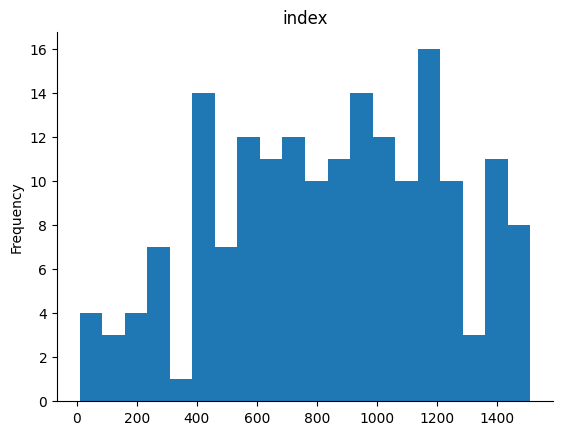

In [36]:
from matplotlib import pyplot as plt
_df_32['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

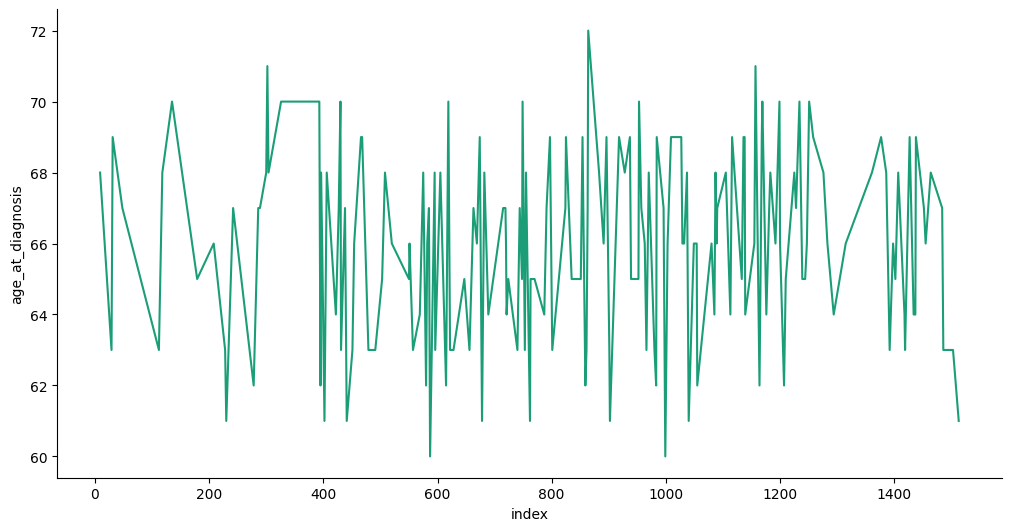

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age_at_diagnosis']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age_at_diagnosis')

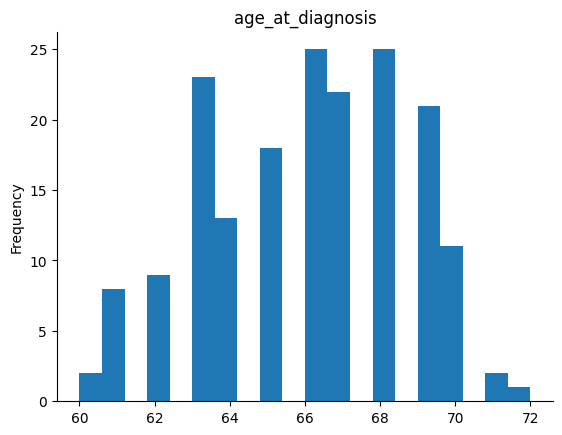

In [34]:
from matplotlib import pyplot as plt
_df_33['age_at_diagnosis'].plot(kind='hist', bins=20, title='age_at_diagnosis')
plt.gca().spines[['top', 'right',]].set_visible(False)